# Сверточные нейронные сети

<!-- https://nextjournal.com/gkoehler/pytorch-mnist -->

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
matplotlib.style.use('seaborn-pastel')
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Mounted at /content/drive


In [ ]:
np.sqrt(np.arange(3))

array([0.        , 1.        , 1.41421356])

#### Встроенные датасеты

https://pytorch.org/vision/stable/datasets.html

Для примера возьмем стандартный датасет с цифрами от 0 до 9

http://yann.lecun.com/exdb/mnist/

In [ ]:
import torch
import torchvision

`0.1307` - среднее значение для MNIST

`0.3081` - стандартное отклонение значение для MNIST

In [ ]:
train_ds = torchvision.datasets.MNIST(
    './mnist/', train=True, download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])
)
test_ds = torchvision.datasets.MNIST(
    './mnist/', train=False, download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_ds, batch_size=64, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_ds, batch_size=64, shuffle=True
)

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

print(f'{batch_idx  }')

0


In [ ]:
example_data

tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.424

In [ ]:
example_targets

tensor([5, 1, 6, 9, 5, 6, 3, 3, 1, 0, 3, 9, 1, 9, 0, 1, 7, 6, 8, 9, 5, 7, 1, 7,
        2, 0, 7, 3, 6, 5, 8, 2, 2, 7, 2, 8, 9, 6, 3, 2, 2, 6, 2, 6, 4, 6, 2, 4,
        3, 3, 0, 3, 5, 1, 5, 2, 4, 9, 4, 6, 6, 0, 0, 7])

In [ ]:
example_data.shape

torch.Size([64, 1, 28, 28])

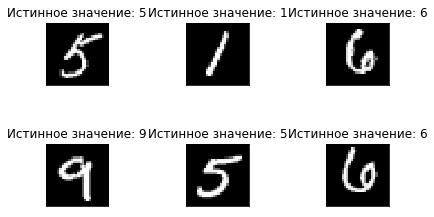

In [ ]:
fig = plt.figure()

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Истинное значение: {example_targets[i]}")
    plt.xticks([])
    plt.yticks([])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        # max_pool2d
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        # max_pool2d
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
network = Net()
optimizer = optim.SGD(
    network.parameters(), lr=0.05,
    momentum=0.9
)

In [ ]:
epochs = 5

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [
    i * len(train_loader.dataset) for i in range(epochs + 1)
]

In [ ]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(
                f'Эпоха обучения: {epoch} '
                f'[{batch_idx * len(data)}/{len(train_loader.dataset)} '
                f'({100 * batch_idx / len(train_loader):.0f}%)]\t'
                f'Loss: {loss.item():.6f}'
            )
        train_losses.append(loss.item())
        train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset))
        )
        # torch.save(network.state_dict(), '/results/model.pth')
        # torch.save(optimizer.state_dict(), '/results/optimizer.pth')

In [ ]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print(
        f'\nТест: Среднее: {test_loss:.4f}, '
        f'Accuracy: {correct}/{len(test_loader.dataset)} '
        f'({100 * correct / len(test_loader.dataset):.0f}%)\n'
    )

In [ ]:
test()


Тест: Среднее: 2.3124, Accuracy: 959/10000 (10%)



In [ ]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Эпоха обучения: 1 [0/60000 (0%)]	Loss: 2.336581
Эпоха обучения: 1 [6400/60000 (11%)]	Loss: 0.749282
Эпоха обучения: 1 [12800/60000 (21%)]	Loss: 0.699234
Эпоха обучения: 1 [19200/60000 (32%)]	Loss: 0.460866
Эпоха обучения: 1 [25600/60000 (43%)]	Loss: 0.678042
Эпоха обучения: 1 [32000/60000 (53%)]	Loss: 0.937714
Эпоха обучения: 1 [38400/60000 (64%)]	Loss: 0.353765
Эпоха обучения: 1 [44800/60000 (75%)]	Loss: 0.310021
Эпоха обучения: 1 [51200/60000 (85%)]	Loss: 0.802466
Эпоха обучения: 1 [57600/60000 (96%)]	Loss: 0.933625

Тест: Среднее: 0.2646, Accuracy: 9242/10000 (92%)

Эпоха обучения: 2 [0/60000 (0%)]	Loss: 0.576046
Эпоха обучения: 2 [6400/60000 (11%)]	Loss: 0.586567
Эпоха обучения: 2 [12800/60000 (21%)]	Loss: 0.376796
Эпоха обучения: 2 [19200/60000 (32%)]	Loss: 1.161811
Эпоха обучения: 2 [25600/60000 (43%)]	Loss: 0.462954
Эпоха обучения: 2 [32000/60000 (53%)]	Loss: 1.010384
Эпоха обучения: 2 [38400/60000 (64%)]	Loss: 0.533038
Эпоха обучения: 2 [44800/60000 (75%)]	Loss: 0.545895
Эпоха 

Text(0, 0.5, 'Отрицательный логарифм правдоподобия')

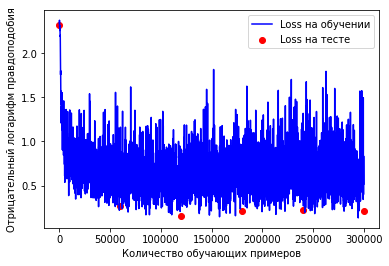

In [ ]:
fig = plt.figure()

plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')

plt.legend(['Loss на обучении', 'Loss на тесте'], loc='upper right')
plt.xlabel('Количество обучающих примеров')
plt.ylabel('Отрицательный логарифм правдоподобия')

In [ ]:
with torch.no_grad():
    output = network(example_data)

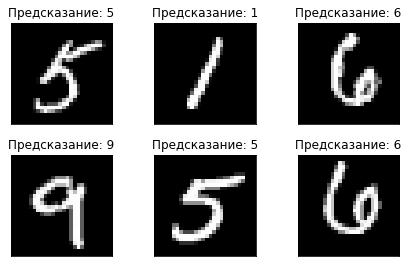

In [ ]:
fig = plt.figure()

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(
        f"Предсказание: {output.data.max(1, keepdim=True)[1][i].item()}"
    )
    plt.xticks([])
    plt.yticks([])